# Credit Amount Prediction

In [1]:
# Importing Generic libraries for the data manipulation and visualisation purpose

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # this is a generic visualisation library

# By passing this parameter we don't have to use the function "plt.show" to display the visualisation.
%matplotlib inline

import seaborn as sns # This is a statistical visualisation library.

pd.options.display.max_columns = None # passing this function to get all the columns on the display.
plt.rcParams['figure.figsize'] = [15,8] # Setting the default figure size for all the visualisation.

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the whole data set.
df = pd.read_csv('credit_prediction.csv', index_col=0)

In [3]:
df.head()

,credit_amount,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial_number,,,,,,,,,,,,,,,,,,,,,,,,
1,1651,NaN,12,YES,YES,A40,A63,517.0,A73,1134,45.36,F,Divorced,A101,4,A123,29,A143,A151,1,A172,1,A191,A201
2,636,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,31.32,M,Umarried,A101,4,A124,46,A143,A153,2,A173,1,A192,A201
3,829,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,47.24,F,Divorced,A101,2,A124,47,A143,A153,1,A173,1,A192,A201
4,870,SILVER,30,YES,NO,A49,A62,326.0,A75,853,34.12,M,Umarried,A101,2,A122,41,A142,A152,2,A173,1,A191,A201
5,1698,SILVER,27,YES,YES,A49,A61,16.0,A72,888,35.52,F,Divorced,A101,1,A122,32,A143,A152,1,A173,2,A192,A201


In [4]:
# Getting the column names by passing this function
df.columns

Index(['credit_amount', 'account_info', 'duration_month', 'Loan', 'Regularity',
       'Purpose', 'savings_account', 'Saving Account', 'employment_st',
       'Salary', 'investment', 'Gender', 'Status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner'],
      dtype='object')

In [5]:
# Checking the lengyth of a dataset, like how many columns and rows are present in our dataset.
df.shape

(1000, 24)

In [6]:
# Extracting the general information of our dataset by passing the function ".info()"
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_amount     1000 non-null   int64  
 1   account_info      606 non-null    object 
 2   duration_month    1000 non-null   int64  
 3   Loan              1000 non-null   object 
 4   Regularity        1000 non-null   object 
 5   Purpose           1000 non-null   object 
 6   savings_account   1000 non-null   object 
 7   Saving Account    817 non-null    float64
 8   employment_st     1000 non-null   object 
 9   Salary            1000 non-null   int64  
 10  investment        1000 non-null   float64
 11  Gender            1000 non-null   object 
 12  Status            1000 non-null   object 
 13  gurantors         1000 non-null   object 
 14  resident_since    1000 non-null   int64  
 15  property_type     1000 non-null   object 
 16  age               1000 non-null   int64  


In [7]:
# Descriptive statistical analysis.
df.describe()

,credit_amount,duration_month,Saving Account,Salary,investment,resident_since,age,credits_no,liables
count,1000.00000,1000.000000,817.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2595.74100,20.903000,273.318237,1607.333000,39.425650,2.845000,35.546000,1.407000,1.155000
std,2473.16172,12.058814,595.970106,775.212973,6.737369,1.103718,11.375469,0.577654,0.362086
min,199.00000,4.000000,1.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000
25%,1128.75000,12.000000,35.000000,964.750000,34.110000,2.000000,27.000000,1.000000,1.000000
50%,1818.50000,18.000000,70.000000,1279.000000,39.760000,3.000000,33.000000,1.000000,1.000000
75%,3059.25000,24.000000,137.000000,2172.750000,44.640000,4.000000,42.000000,2.000000,1.000000
max,15945.00000,72.000000,3791.000000,3499.000000,53.610000,4.000000,75.000000,4.000000,2.000000


In [8]:
# Categorical Descriptive analysis.
df.describe(include='O').T

,count,unique,top,freq
account_info,606,3,BRONZE,274
Loan,1000,2,YES,911
Regularity,1000,2,YES,619
Purpose,1000,5,A40,832
savings_account,1000,5,A61,603
employment_st,1000,5,A73,339
Gender,1000,2,M,690
Status,1000,3,Umarried,548
gurantors,1000,3,A101,907
property_type,1000,4,A123,332


In [9]:
# EDA And Feature engenerring
# Checking the missing values.
df.isna().sum()

credit_amount         0
account_info        394
duration_month        0
Loan                  0
Regularity            0
Purpose               0
savings_account       0
Saving Account      183
employment_st         0
Salary                0
investment            0
Gender                0
Status                0
gurantors             0
resident_since        0
property_type         0
age                   0
installment_type      0
housing_type          0
credits_no            0
job_type              0
liables               0
telephone             0
foreigner             0
dtype: int64

 There are lots of missing values in the "account_info" columns,
 There are certain methods to treat the missing values in the dataset,
 we can simply drop the column,
 or we can replace the missing values with its "Mean" or "Standard Deviation" of the column if it is,
 numrical type, if it is a categorical then we need to check manually the correaltion bewteen the missing values column,
 and the other columns, after then we can update our missing values.

In [10]:
# So here we are dropping the whole column of account_info, because there are 1/4th missing values,
# in this whole column and the dataset is of 1000 columns only.
df.drop('account_info',axis =1, inplace =True)

In [11]:
df.shape

(1000, 23)

In [12]:
# Confirming that the missing value columns is dropped or not.
df.isna().sum()

credit_amount         0
duration_month        0
Loan                  0
Regularity            0
Purpose               0
savings_account       0
Saving Account      183
employment_st         0
Salary                0
investment            0
Gender                0
Status                0
gurantors             0
resident_since        0
property_type         0
age                   0
installment_type      0
housing_type          0
credits_no            0
job_type              0
liables               0
telephone             0
foreigner             0
dtype: int64

In [13]:
# We are dropping the "NA" values from the dataset, because there are missing values left in the "Saving Account" column.
df.dropna(inplace=True)

In [14]:
# After dropping the "NA" values we are re-checking it again.
df.isna().sum()

credit_amount       0
duration_month      0
Loan                0
Regularity          0
Purpose             0
savings_account     0
Saving Account      0
employment_st       0
Salary              0
investment          0
Gender              0
Status              0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

In [15]:
df.shape

(817, 23)

In [16]:
# checking the relationship between the varaibles.
corr = df.corr()
corr

,credit_amount,duration_month,Saving Account,Salary,investment,resident_since,age,credits_no,liables
credit_amount,1.000000,0.461492,-0.046350,0.210700,0.040298,0.026183,0.012435,0.029673,-0.010302
duration_month,0.461492,1.000000,-0.037323,-0.069912,0.053142,0.041109,-0.045577,-0.003747,-0.060542
Saving Account,-0.046350,-0.037323,1.000000,-0.055172,-0.007442,0.028610,0.075832,0.026762,-0.028465
Salary,0.210700,-0.069912,-0.055172,1.000000,0.003609,-0.033824,-0.039830,-0.003976,0.091023
investment,0.040298,0.053142,-0.007442,0.003609,1.000000,0.055122,0.045724,0.029773,0.006872
resident_since,0.026183,0.041109,0.028610,-0.033824,0.055122,1.000000,0.260243,0.103537,0.049763
age,0.012435,-0.045577,0.075832,-0.039830,0.045724,0.260243,1.000000,0.165771,0.131560
credits_no,0.029673,-0.003747,0.026762,-0.003976,0.029773,0.103537,0.165771,1.000000,0.093883
liables,-0.010302,-0.060542,-0.028465,0.091023,0.006872,0.049763,0.131560,0.093883,1.000000


# Exploratory Data Analysis
## Feature Engineering

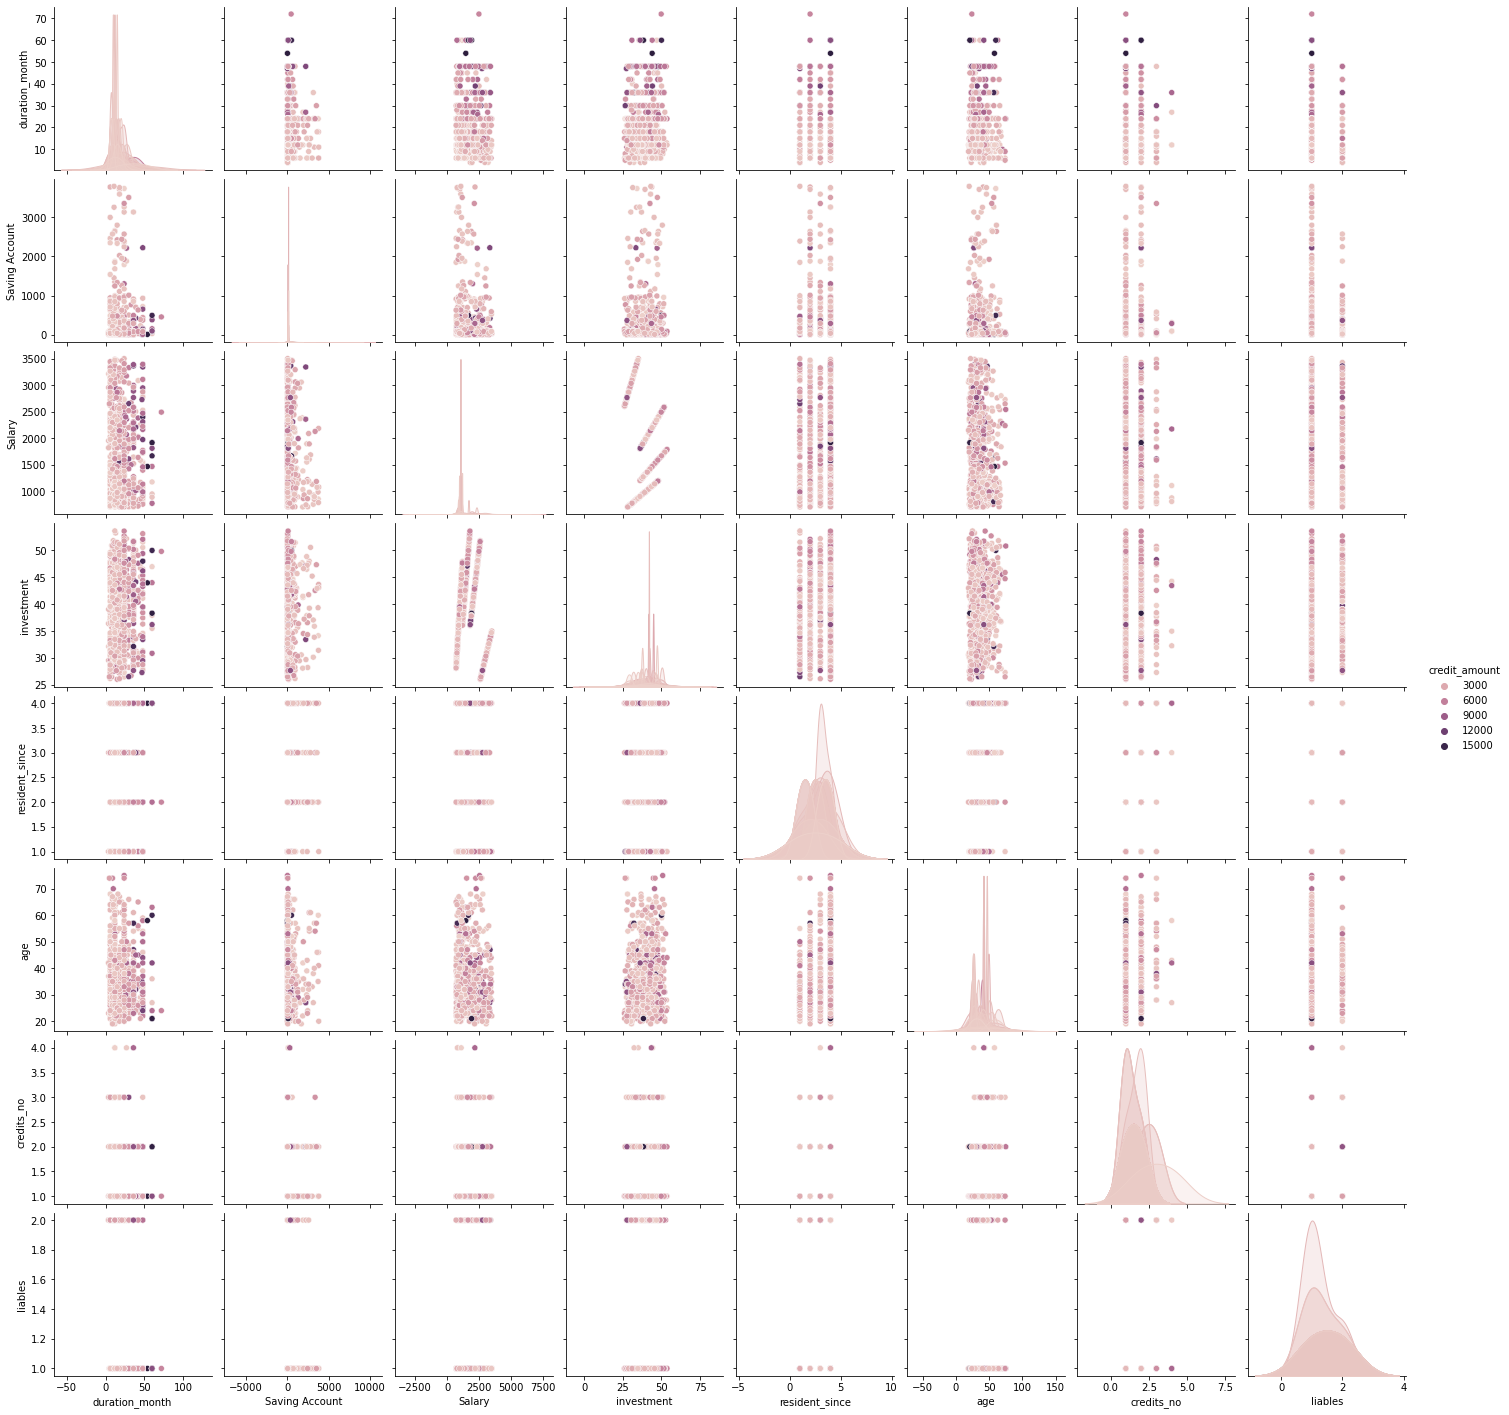

In [17]:
# Creating a PairPlot for checking the how the amounts affecting the indpendent variables.
sns.pairplot(df, hue='credit_amount')
plt.show()

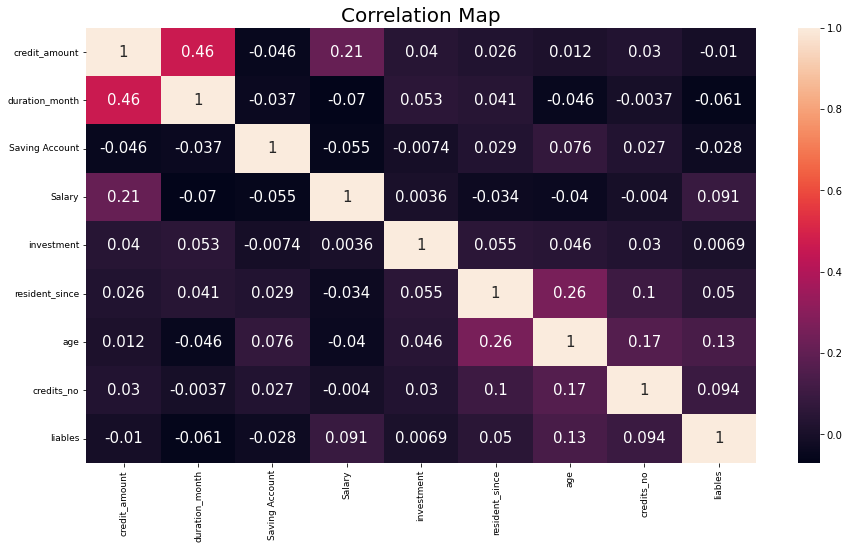

In [18]:
# Created the heatmap for checking the "positive" and "negative" relation between the variables.
sns.heatmap(df.corr(), annot=True, annot_kws={'size':15})
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title("Correlation Map", fontsize=20)
plt.show()

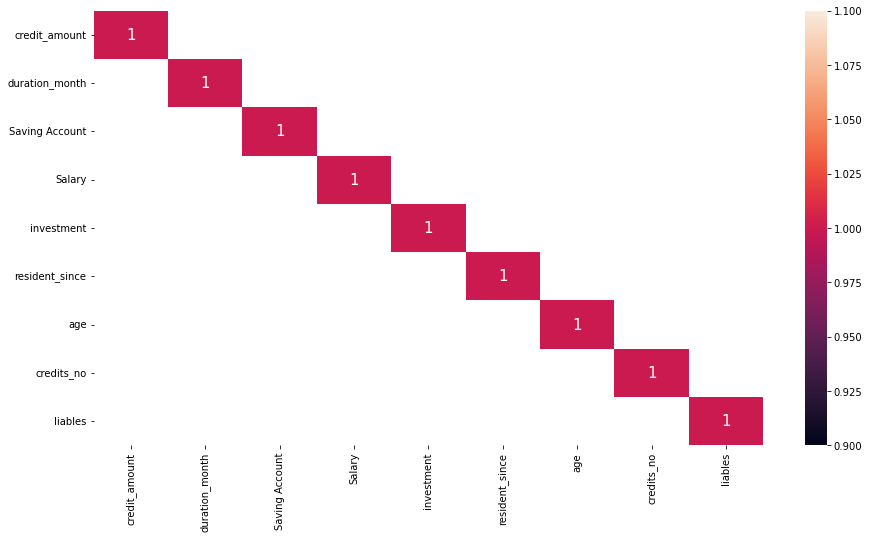

In [19]:
# Extracting the highly positive and highly negative variables by passing the conditional statement.
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], annot=True, annot_kws={'size':15})
plt.show()

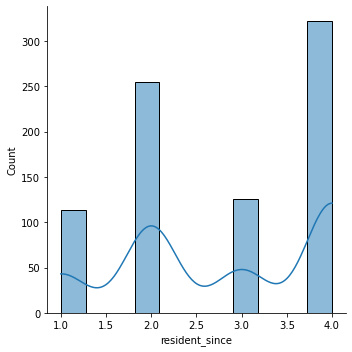

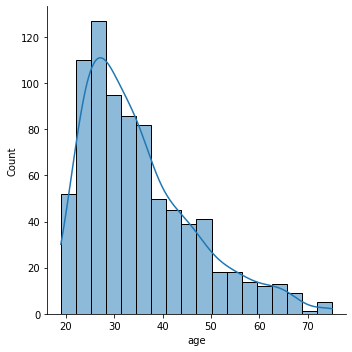

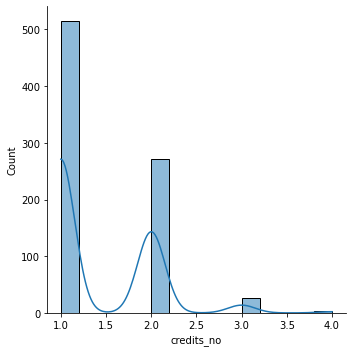

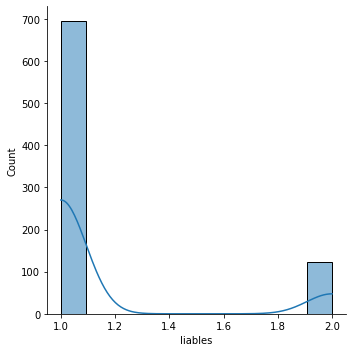

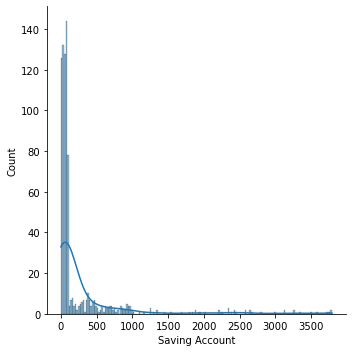

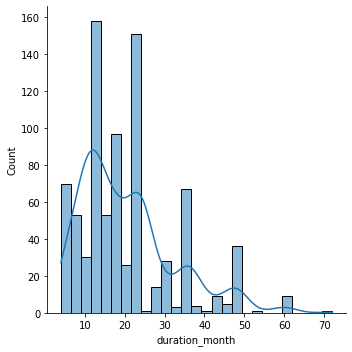

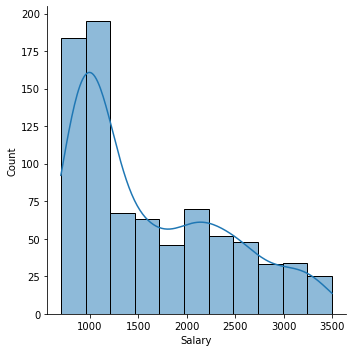

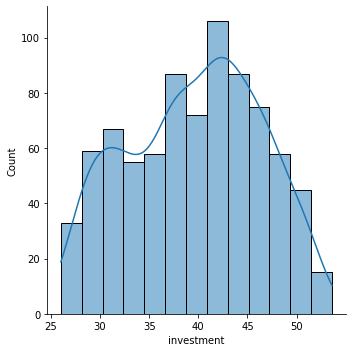

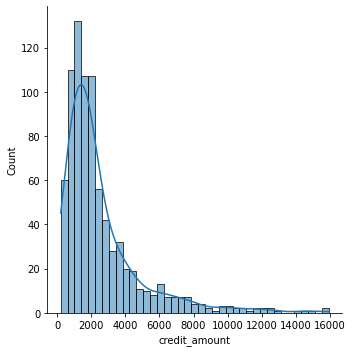

In [20]:
# Creating the "displot" with KDE for checking the normallity of a dataset.
sns.displot(data = df, x = "resident_since", kde = True)
sns.displot(data = df, x = "age", kde = True)
sns.displot(data = df, x = "credits_no", kde = True)
sns.displot(data = df, x = "liables", kde = True)
sns.displot(data = df, x = 'Saving Account', kde = True)
sns.displot(data = df, x = 'duration_month', kde = True)
sns.displot(data = df, x = 'Salary', kde = True)
sns.displot(data = df, x = 'investment', kde = True)
sns.displot(data = df, x = 'credit_amount', kde = True)
plt.tight_layout()

In [21]:
# Getting all the string type columns from a dataset.
string_cols = df.select_dtypes(include=np.object)

# Allotting a variable name "col" for storing the string data type.
col = list(string_cols.columns)

print(col) # Printing the variable "col".

['Loan', 'Regularity', 'Purpose', 'savings_account', 'employment_st', 'Gender', 'Status', 'gurantors', 'property_type', 'installment_type', 'housing_type', 'job_type', 'telephone', 'foreigner']


In [22]:
# Using this "enumerate" function to allocate the variables names with a index numbers.
list(enumerate(col))

[(0, 'Loan'),
 (1, 'Regularity'),
 (2, 'Purpose'),
 (3, 'savings_account'),
 (4, 'employment_st'),
 (5, 'Gender'),
 (6, 'Status'),
 (7, 'gurantors'),
 (8, 'property_type'),
 (9, 'installment_type'),
 (10, 'housing_type'),
 (11, 'job_type'),
 (12, 'telephone'),
 (13, 'foreigner')]

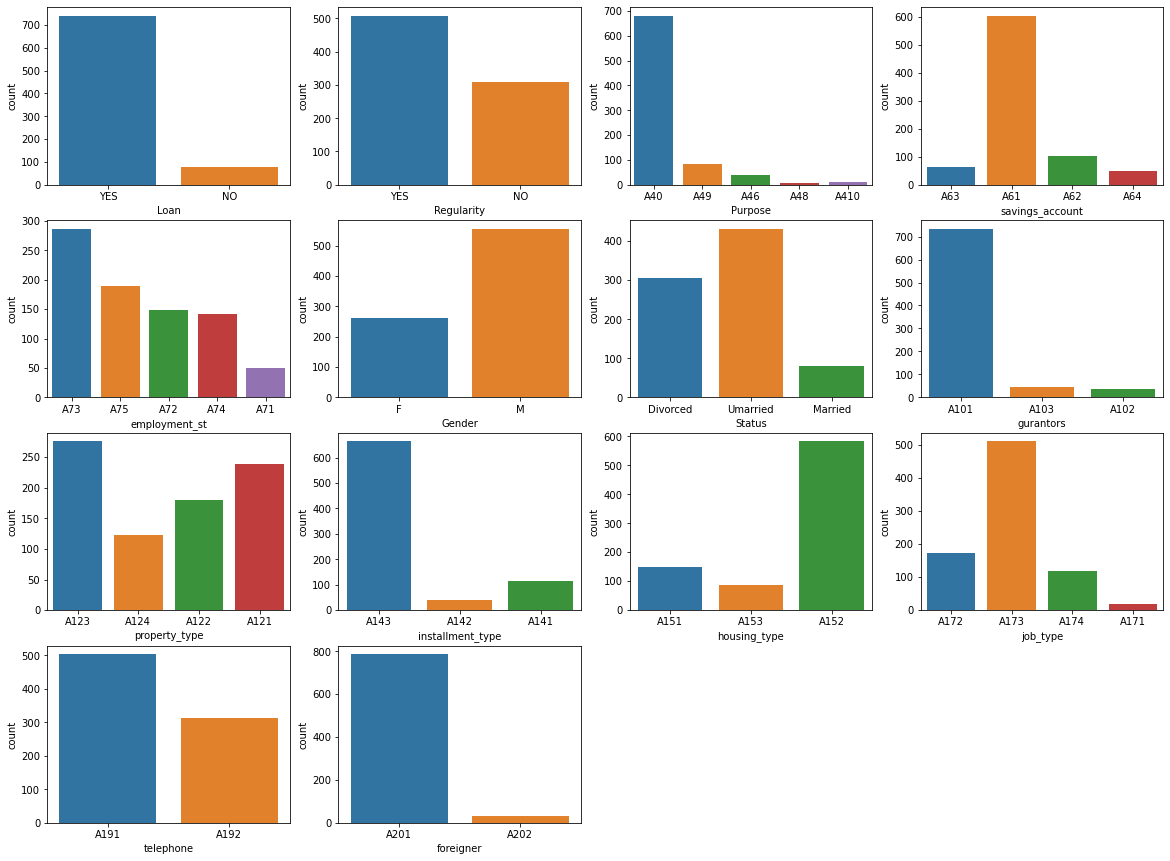

In [23]:
# Running the loop for showing categorical variables in a ordered way.

plt.figure(figsize=[20,15])
# Using the "enumerate" to give the variables the indexing.
for i in enumerate(col): 
    # setting the loaction of a plots by using "subplot" function.
    plt.subplot(4,4,i[0]+1) 
    # Passing the it with a "seaborn countplot" to showcase the visualisation.
    sns.countplot(i[1], data=df) 

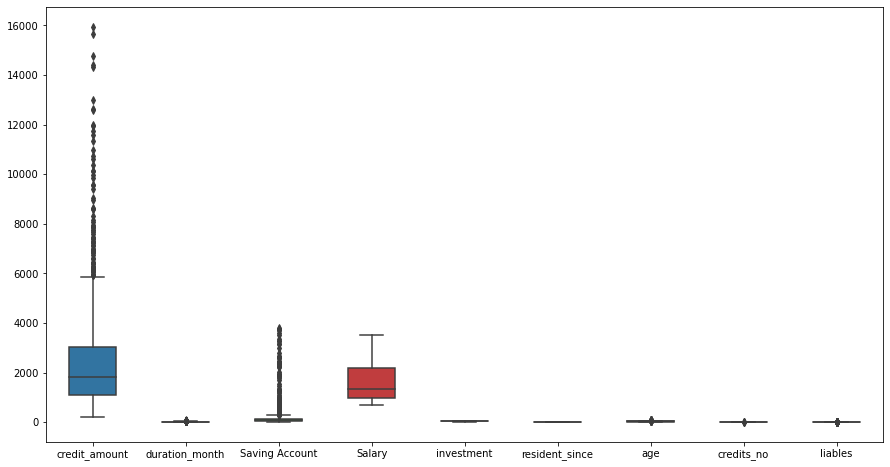

In [24]:
# Creating boxplot to check the outliers in the dataset.
sns.boxplot(data = df, width=0.5)
plt.show()

In [25]:
# As we can see that the "maximum" age is 75 and "minimum" age is 19,
# so as per the age bracket between (19 to 75) we are not considering this column as an outlier,
# if there is any negative lower_boundary then we should treat them as a outliers.
print("Minmum Age:",df.age.unique().min())
print("Maximum Age:", df.age.unique().max())

Minmum Age: 19
Maximum Age: 75


In [26]:
# Getting all the numeric type columns from a dataset.
numeric_columns = df.select_dtypes(include=np.number)

# Allotting a variable name "cols" for storing the numeric data type.
cols = list(numeric_columns.columns)

print(cols) # Printing the variable "col".

['credit_amount', 'duration_month', 'Saving Account', 'Salary', 'investment', 'resident_since', 'age', 'credits_no', 'liables']


In [27]:
# Again Using this "enumerate" function as used before to allocate the variables names with a index numbers.
list(enumerate(cols))

[(0, 'credit_amount'),
 (1, 'duration_month'),
 (2, 'Saving Account'),
 (3, 'Salary'),
 (4, 'investment'),
 (5, 'resident_since'),
 (6, 'age'),
 (7, 'credits_no'),
 (8, 'liables')]

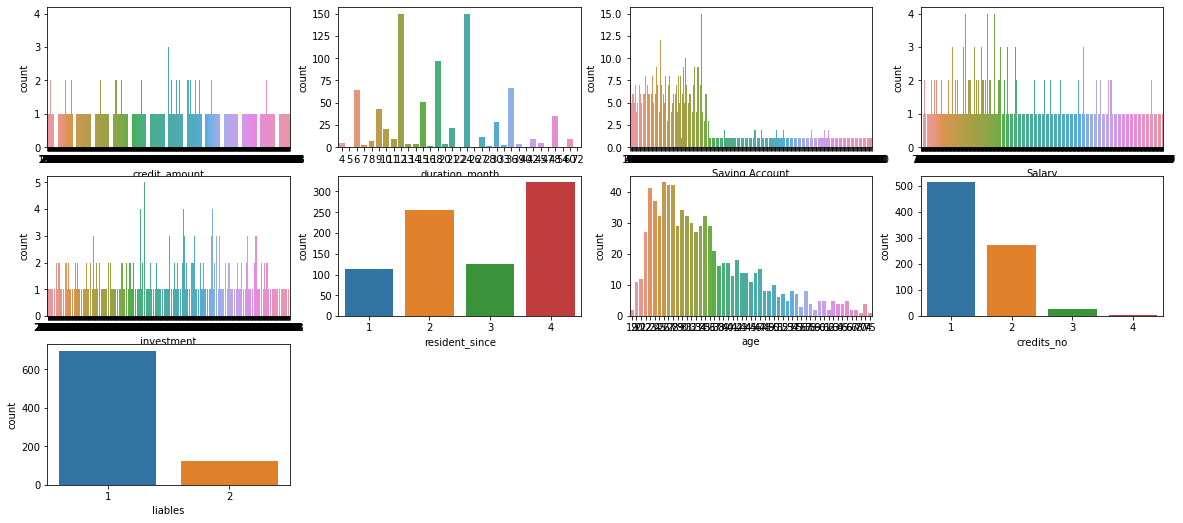

In [28]:
plt.figure(figsize=[20,15])
# Using the "enumerate" to give the variables the indexing.
for i in enumerate(cols): 
    # setting the loaction of a plots by using "subplot" function.
    plt.subplot(5,4,i[0]+1) 
    # Passing the it with a "seaborn countplot" to showcase the visualisation.
    sns.countplot(i[1], data=df) 

By plotting these graphs, we can clearly see that the dataset is not normally distributed, so we have perform "Feature Scaling" of the datset.

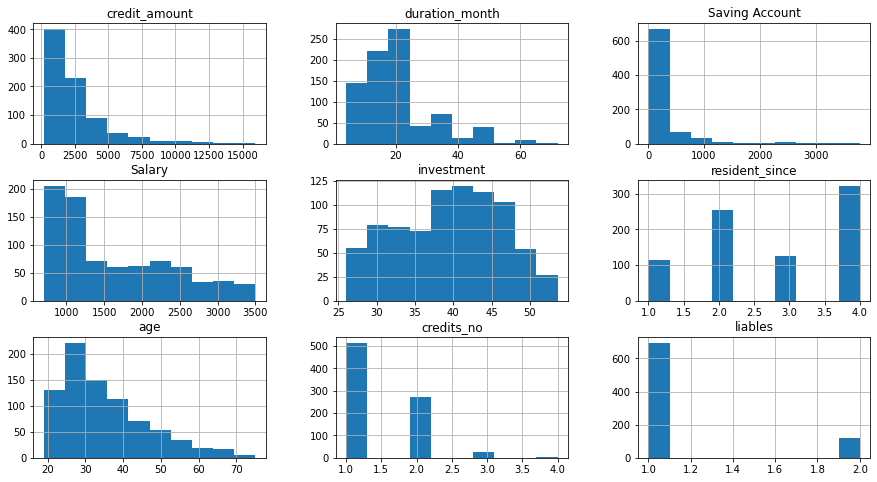

In [29]:
# Plotting the Histogram for checking the distribution of the whole "dataset"
df.hist()
plt.show()

# Label Encoding

In [30]:
# Importing the "Encoder" library from sklearn. 
from sklearn.preprocessing import LabelEncoder

In [31]:
# Seperating "string" and "numeric" data for "One Hot Encoding"
df_categorical = df.select_dtypes(include='O')
df_numeric = df.select_dtypes(include=np.number)

In [32]:
df_categorical.columns

Index(['Loan', 'Regularity', 'Purpose', 'savings_account', 'employment_st',
       'Gender', 'Status', 'gurantors', 'property_type', 'installment_type',
       'housing_type', 'job_type', 'telephone', 'foreigner'],
      dtype='object')

In [33]:
# Passing the labelencoder() function.
encoder = LabelEncoder()

In [34]:
# Performing Label Encoding by using "sklearn.preprocessing".
df_categorical['Loan']=encoder.fit_transform(df_categorical['Loan'])
df_categorical['Regularity']=encoder.fit_transform(df_categorical['Regularity'])
df_categorical['Purpose']=encoder.fit_transform(df_categorical['Purpose'])
df_categorical['savings_account']=encoder.fit_transform(df_categorical['savings_account'])
df_categorical['employment_st']=encoder.fit_transform(df_categorical['employment_st'])
df_categorical['Gender']=encoder.fit_transform(df_categorical['Gender'])
df_categorical['Status']=encoder.fit_transform(df_categorical['Status'])
df_categorical['gurantors']=encoder.fit_transform(df_categorical['gurantors'])
df_categorical['property_type']=encoder.fit_transform(df_categorical['property_type'])
df_categorical['installment_type']=encoder.fit_transform(df_categorical['installment_type'])
df_categorical['housing_type']=encoder.fit_transform(df_categorical['housing_type'])
df_categorical['job_type']=encoder.fit_transform(df_categorical['job_type'])
df_categorical['telephone']=encoder.fit_transform(df_categorical['telephone'])
df_categorical['foreigner']=encoder.fit_transform(df_categorical['foreigner'])

In [35]:
df_categorical.head()

,Loan,Regularity,Purpose,savings_account,employment_st,Gender,Status,gurantors,property_type,installment_type,housing_type,job_type,telephone,foreigner
serial_number,,,,,,,,,,,,,,
1,1,1,0,2,2,0,0,0,2,2,0,1,0,0
2,1,0,0,0,4,1,2,0,3,2,2,2,1,0
3,1,1,0,1,4,0,0,0,3,2,2,2,1,0
4,1,0,4,1,4,1,2,0,1,1,1,2,0,0
5,1,1,4,0,1,0,0,0,1,2,1,2,1,0


In [36]:
df_numeric.head()

,credit_amount,duration_month,Saving Account,Salary,investment,resident_since,age,credits_no,liables
serial_number,,,,,,,,,
1,1651,12,517.0,1134,45.36,4,29,1,1
2,636,48,18.0,783,31.32,4,46,2,1
3,829,24,389.0,1181,47.24,2,47,1,1
4,870,30,326.0,853,34.12,2,41,2,1
5,1698,27,16.0,888,35.52,1,32,1,2


In [37]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit_amount   817 non-null    int64  
 1   duration_month  817 non-null    int64  
 2   Saving Account  817 non-null    float64
 3   Salary          817 non-null    int64  
 4   investment      817 non-null    float64
 5   resident_since  817 non-null    int64  
 6   age             817 non-null    int64  
 7   credits_no      817 non-null    int64  
 8   liables         817 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 96.1 KB


In [38]:
# Now cancatenating the categorical data with the numeric features 
new_df = pd.concat([df_numeric, df_categorical], axis=1)

In [39]:
new_df.shape

(817, 23)

In [40]:
new_df.head()

,credit_amount,duration_month,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan,Regularity,Purpose,savings_account,employment_st,Gender,Status,gurantors,property_type,installment_type,housing_type,job_type,telephone,foreigner
serial_number,,,,,,,,,,,,,,,,,,,,,,,
1,1651,12,517.0,1134,45.36,4,29,1,1,1,1,0,2,2,0,0,0,2,2,0,1,0,0
2,636,48,18.0,783,31.32,4,46,2,1,1,0,0,0,4,1,2,0,3,2,2,2,1,0
3,829,24,389.0,1181,47.24,2,47,1,1,1,1,0,1,4,0,0,0,3,2,2,2,1,0
4,870,30,326.0,853,34.12,2,41,2,1,1,0,4,1,4,1,2,0,1,1,1,2,0,0
5,1698,27,16.0,888,35.52,1,32,1,2,1,1,4,0,1,0,0,0,1,2,1,2,1,0


In [41]:
# Seperating the "Dependent" and "Independent" variables from the whole dataset.
x = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

In [42]:
# Checking the relationship in the "Independent variables".
x_corr = x.corr()

<AxesSubplot:>

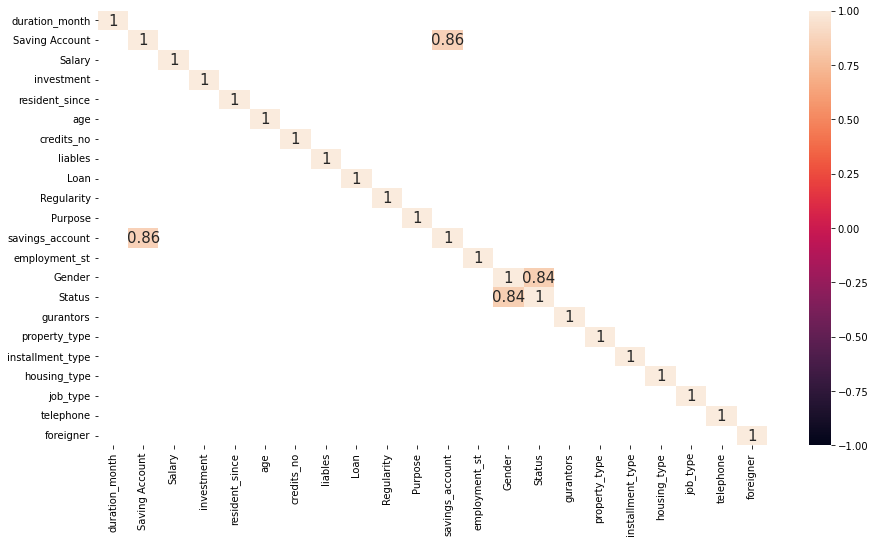

In [43]:
# Creating heatmap for extracting only the highly correlated variabels from the "Independent varaibles".
sns.heatmap(x_corr[(x_corr >= 0.7) | (x_corr <= -0.7)], annot=True, annot_kws={'size':15},
           vmin=-1.0, vmax=1.0)

In [44]:
x.shape

(817, 22)

In [45]:
x.head()

,duration_month,Saving Account,Salary,investment,resident_since,age,credits_no,liables,Loan,Regularity,Purpose,savings_account,employment_st,Gender,Status,gurantors,property_type,installment_type,housing_type,job_type,telephone,foreigner
serial_number,,,,,,,,,,,,,,,,,,,,,,
1,12,517.0,1134,45.36,4,29,1,1,1,1,0,2,2,0,0,0,2,2,0,1,0,0
2,48,18.0,783,31.32,4,46,2,1,1,0,0,0,4,1,2,0,3,2,2,2,1,0
3,24,389.0,1181,47.24,2,47,1,1,1,1,0,1,4,0,0,0,3,2,2,2,1,0
4,30,326.0,853,34.12,2,41,2,1,1,0,4,1,4,1,2,0,1,1,1,2,0,0
5,27,16.0,888,35.52,1,32,1,2,1,1,4,0,1,0,0,0,1,2,1,2,1,0


In [46]:
y.head()

serial_number
1    1651
2     636
3     829
4     870
5    1698
Name: credit_amount, dtype: int64

In [47]:
# Performing the log transformation for normalizing the "Dependent Varaible"
y_with_log = np.log(y)

In [48]:
y_with_log.head()

serial_number
1    7.409136
2    6.455199
3    6.720220
4    6.768493
5    7.437206
Name: credit_amount, dtype: float64

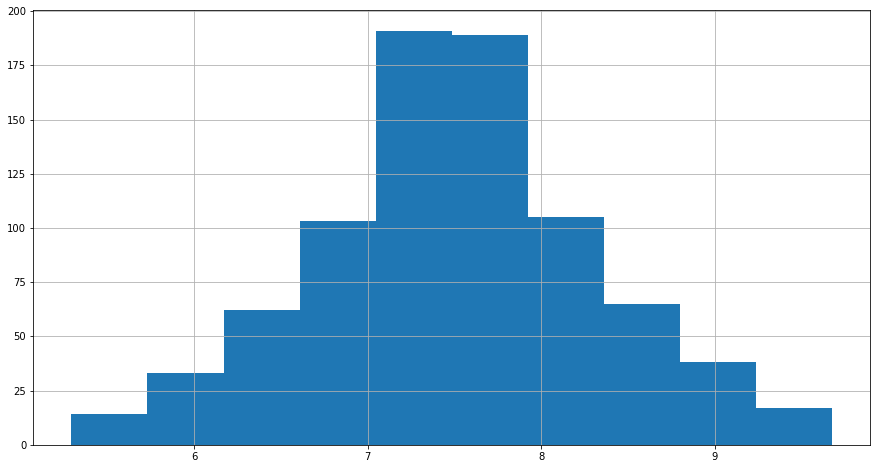

In [49]:
# Plotting histogram for checking the normality of the dependent variable.
y_with_log.hist()
plt.show()

# Model Building

In [50]:
# Importing all the necessary libaraies from the "sklearn" library, for model building,
# and dataset splitting into "train" and "test",
# and all the necessary "metrics" packages,
# for calculating the evaluation.

from sklearn.model_selection import train_test_split

# Importing all the necessary Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Importing "preprocessing" package from "Sklearn" library,
# for normalising the dataset.

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [51]:
# We are using "MinMaxScaler" for normalisation of the dataset.
scaler = MinMaxScaler()

In [52]:
# Splitting the dataset into "train" and "test" sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=42)
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (653, 22)
X_test: (164, 22)
Y_train: (653,)
Y_test: (164,)


In [53]:
# Importing the stats tools for Analysis of the linear model.
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

In [54]:
# Adding a constant in x_train dataset.
x_train_sm = sm.add_constant(x_train)

In [55]:
# Creating the "Ordinary Least Square" Regression model.
lr = sm.OLS(y_train, x_train_sm).fit()

# Feature Selection

In [56]:
# Printthe summary of the "OLS Model".
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     12.29
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.77e-36
Time:                        01:07:42   Log-Likelihood:                -5894.7
No. Observations:                 653   AIC:                         1.184e+04
Df Residuals:                     630   BIC:                         1.194e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1207.7119    868.214  

As we can see that some variables p-values are higher than 0.05 so we have remove those variables as we know that,
if the values is greater that 0.05 we have reject null hypothesis and proceed with the alternate hypothesis.

In [57]:
# Importing Feature selection libararies.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression

In [58]:
# Using information gain technique to find out the important features from the train dataset.
info_gain = mutual_info_regression(x_train, y_train)
info_gain

array([1.12631121e-01, 1.15046362e-02, 5.61797368e-02, 0.00000000e+00,
       0.00000000e+00, 4.16004359e-02, 2.71972589e-02, 0.00000000e+00,
       6.26588755e-03, 1.97351190e-02, 2.35651512e-03, 0.00000000e+00,
       3.24165755e-02, 0.00000000e+00, 2.36512748e-02, 0.00000000e+00,
       4.52154120e-02, 0.00000000e+00, 0.00000000e+00, 2.45060556e-02,
       2.25525914e-02, 9.34290658e-05])

In [59]:
# checking the values which varaible to consider and which to not.
info_gain = pd.Series(info_gain)
info_gain.index = x_train.columns
info_gain.sort_values(ascending=False)

duration_month      0.112631
Salary              0.056180
property_type       0.045215
age                 0.041600
employment_st       0.032417
credits_no          0.027197
job_type            0.024506
Status              0.023651
telephone           0.022553
Regularity          0.019735
Saving Account      0.011505
Loan                0.006266
Purpose             0.002357
foreigner           0.000093
Gender              0.000000
gurantors           0.000000
liables             0.000000
installment_type    0.000000
housing_type        0.000000
resident_since      0.000000
investment          0.000000
savings_account     0.000000
dtype: float64

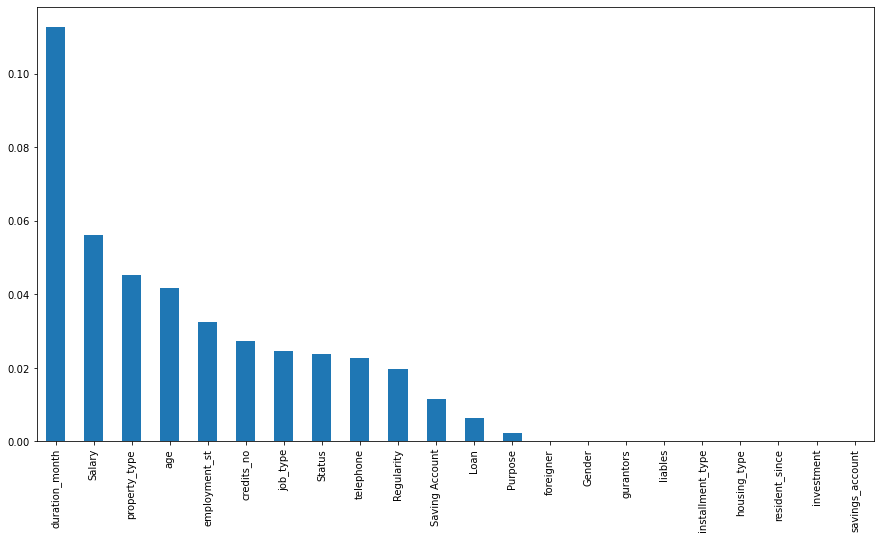

In [60]:
# Creating the Bar Chart
info_gain.sort_values(ascending=False).plot.bar()
plt.show()

In [61]:
# Selecting the top 10 features from the train datset. 
feature_selection = SelectKBest(score_func=mutual_info_regression, k=10)
feature_selection.fit(x_train, y_train)
x_train.columns[feature_selection.get_support()]

Index(['duration_month', 'Salary', 'age', 'credits_no', 'Regularity',
       'employment_st', 'Status', 'property_type', 'job_type', 'telephone'],
      dtype='object')

In [62]:
# Again Splitting the dataset into "train" and "test" sets
x_train,x_test,y_train,y_test = train_test_split(x[['duration_month', 'Salary', 'age', 'credits_no', 'Regularity',
       'employment_st', 'Status', 'property_type', 'job_type', 'telephone']],
                                                 y, test_size=0.20, random_state=42)
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (653, 10)
X_test: (164, 10)
Y_train: (653,)
Y_test: (164,)


In [63]:
# We are using "MinMaxScaler" for normalisation of the dataset.
scaler = MinMaxScaler()

In [64]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [65]:
# Importing Regression algorithms from the "sklearn" module.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor

In [66]:
# Comparing multiple models by running the "for loop".

model = [LinearRegression(), Ridge(), Lasso(), SGDRegressor()]

for mod in model:
    regression = mod
    regression = regression.fit(x_train,y_train)
    print(mod,"======>>" ,'Accuracy:', regression.score(x_test,y_test))

LinearRegression() ======>> Accuracy: 0.3848580252008358
Ridge() ======>> Accuracy: 0.3791551895921087
Lasso() ======>> Accuracy: 0.3847928681909141
SGDRegressor() ======>> Accuracy: 0.3544353507008523


In [67]:
# Selecting the best model by compairing multiple models.
model = LinearRegression()

In [68]:
# Fitting the model into "x_train" and "x_test".
reg = model.fit(x_train, y_train)

In [69]:
# Predicting the values.
y_pred = reg.predict(x_test)

In [70]:
# First Predicted value of the row.
y_pred[0]

4970.869792545925

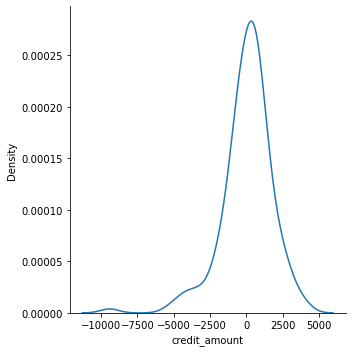

In [71]:
# Creating a "KDE" plot for getting the distribution of error.
sns.displot(y_pred-y_test, kind='kde')
plt.show()

In [72]:
# Printing all scores of the simple linear model.
print("R2 Score:",r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.3848580252008358
MSE: 3029558.2779368036
MAE: 1233.0422952388506
RMSE: 1740.562632580857
